# SLU11 | String & File Handling: Exercise Notebook

***

Now we're going to test how well you understood the learning notebook.

Also, this notebook is going to often require some **googling skills**. 

It's very important to learn **`how to google anything you don't remember or don't know how to do.`**

## Start by importing these packages

In [1]:
# for evaluation purposes
import hashlib
import os
from IPython.display import display, Image

def _hash(s):
    return hashlib.blake2b(
        bytes(str(s), encoding='utf8'),
        digest_size=5
    ).hexdigest()

src = os.path.join('.','assets','eba68db97a.jpg') 

## PART 1

### Exercise 1
- Open a local file called **`'assignment.txt'`** and store it in a variable called **`'f'`**.
- Read the **whole file** and store it in a variable called **`'text'`**.

⚠️ _The variable should consist of **only one string representing all the lines from the file.**_

In [2]:
# f = ...
# text = ...

### BEGIN SOLUTION
# we use the built-in open() function in a read-mode to open a file
f = open('assignment.txt', mode='r')

# we use read() function to read the whole file and store the result in the 'text' variable
text = f.read()
### END SOLUTION

In [3]:
assert isinstance(text, str), "Are you sure you read the whole file as one string (not as list of strings)?"
assert _hash(len(text)) == 'a980c09096', "The length of the string doesn't match"
assert _hash(text[0]) == '5ca379c9c1', "Did you read the correct file?"

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


### Exercise 2
- Move the **`read cursor`** to the **beginning of the file** stored in variable **`f`**.
- Read **each line** of the file and store it in a variable called **`lines`**.

⚠️ _The variable should be a **list of strings.**_

In [4]:
# ...
# lines = ...

### BEGIN SOLUTION
# move the read cursor to the beginning of the file
f.seek(0) 

# read each line and store it as an element of a list
lines = f.readlines()
### END SOLUTION

In [5]:
assert _hash(len(lines)) != '5b4838043f', "Did you move the cursor to the beginning of the file?"
assert isinstance(lines, list), "Are you sure you stored the file as a list of strings?"
assert _hash(len(lines)) == 'd4fe3de58a', "The number of string elements in the list doesn't match"
assert _hash(lines[0]) =='0d3c2c6fb2', "Are you sure you read the correct file?"

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


***

## PART 2

### Exercise 3
Let's preprocess our file.
- For each **string** in the **`lines`** **list**:
    > remove all the **`newline characters`** and save the result in **the same variable**.

In [6]:
# lines = ...
### BEGIN SOLUTION
# we call strip() method for symbols '\n' for each line in the variable
lines = [line.strip('\n') for line in lines]
### END SOLUTION

In [7]:
assert isinstance(lines, list), "Lines has to be a list of strings"
assert _hash(len(lines)) == 'd4fe3de58a', "The number of strings in the list doesn't match"
assert _hash(len(lines[0])) =='fdeb53ac14', "Are you sure you removed the newline characters?"

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


### Exercise 4

Remove all the **empty lines** in the **`lines`** **list** and save the result in **the same variable**:

In [8]:
# lines = ...

### BEGIN SOLUTION
# we use list comprehensions to return a list of lines, 
# where the len() of lines is bigger then 0
lines = [line for line in lines if len(line) > 0]

# alternative solution:
# "if line" means, that if line is not an empty string it'll be `True`, otherwise `False`. 
# lines = [line for line in lines if line]
### END SOLUTION

In [9]:
assert _hash(len(lines)) == '427566cc6c', "Are you sure that you removed all the empty strings?"

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


### Exercise 5
Concatenate all the **strings** in the **`lines` list** into one **long string**.

In [10]:
# lines = ...
### BEGIN SOLUTION
# join lines with a space symbol
lines = ' '.join(lines)
### END SOLUTION

In [11]:
assert isinstance(lines, str), "It's not a string"
assert _hash(len(lines)) == 'd085807d6c', "The length of the string doesn't match"

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


### Exercise 6
Convert the **`lines`** (**string**) to a **list of words** and save it in a variable called **`'words'`**.

🌟 **Hint:** _Use space symbol as a separator_ 🌟

In [12]:
# words = ...

### BEGIN SOLUTION
# split the lines into a list of words
words = lines.split()
### END SOLUTION

In [13]:
assert isinstance(words, list), "It's not a list"
assert isinstance(words[0], str), "The list has to consist of strings"
assert _hash(len(words)) == '8be07733f2', "The number of words doesn't match"

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


### Exercise 7
Convert all the **strings** in **`words`** to lowercase.

In [14]:
# words = ...

### BEGIN SOLUTION
# apply lower() method to each word in the list
words = [word.lower() for word in words]
### END SOLUTION

In [15]:
assert all([word.islower() for word in words]), "Not all the words are lowercase"

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


### Exercise 8
In **Natural Language Processing** - **`NLP`** we usually want to remove some words that have no meaning. They are usually called **`stop words`**.

We're not dealing with **NLP** yet, but let's also **remove such words**.
- From the **`words`** list remove the words that are in the **`stop_words`** list:
> stop_words = [ **`'on'`, `'an'`, `'in'`, `'a'`, `'of'`, `'the'`, `'and'`** ]

In [16]:
# stop_words = ['on','an','in','a','of','the','and']
# words = ...

### BEGIN SOLUTION
# create stop_words list
stop_words = ['on','an','in','a','of','the','and']

# create a list of words that are NOT in stop_words
words = [word for word in words if word not in stop_words]
### END SOLUTION

In [17]:
assert _hash(len(words)) == 'd03f94b383', "The number of words doesn't match"

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


### Exercise 9
Keep only unique words in the **`words`** list created on **exercise 8**.

Store them in the same variable. **It has to be a list of unique words!**

🌟 **Hint:** _You'll need some **Googling** on this question_ 🌟

In [18]:
# words = ...

### BEGIN SOLUTION
# the easiest way to solve this exercise is converting the list of words into a `set` and then back to a list
# why does it work? 
# Well, because `set` consists of ONLY unique elements.
# So when we call set(words), we create a set of only unique words
# and then we want to convert it back to a list, 
# so we can call list() on the result of the previous function
words = list(set(words))
### END SOLUTION

In [19]:
assert isinstance(words, list), "We need to store the unique words in a list"
assert _hash(len(words)) == 'f062f478b4', "The number of words doesn't match"

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


### Exercise 10
Create a function to find **if a word has more characters** than a given **number**:
- Create the function **`is_long()`**, which must:
- Receive **2 parameters:**
> * **`string`**: representing the word that we're checking.
> * **`integer`**: representing the minimum length that word should have.
- Return:
> * **`True`**: if length of the word **>=** `integer`;
> * **`False`**: if length of the word **<** `integer`;

In [20]:
# def is_long(word, number):
#    ...

### BEGIN SOLUTION
def is_long(word, number):
    # check if a length of the words is >= then the input parameneter
    if len(word) >= number:
        return True
    # we get to this place only if len(word) >= number was False. 
    # So it's equavalent to "else: return False"
    return False
### END SOLUTION

In [21]:
assert is_long('Exercise', 5), "The function didn't pass the test for the following parameters: word='exercise', num=5"
assert not is_long('Exercise', 10), "The function didn't pass the test for the following parameters: word='exercise', num=10"

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


### Exercise 11
- Apply **`is_long()`** function to **each word** in **`'words'`** variable you have created in **Exercise 9**.
- Use the value **`5`** for the **`integer`** parameter.
- Store the result in a variable called **`long_words`**.

In [22]:
# long_words = ...

### BEGIN SOLUTION
# create a list of words if they are longer then 5 elements
long_words = [word for word in words if is_long(word, 5)]
### END SOLUTION

In [23]:
assert _hash(len(long_words)) == 'dadbc194c4', "The number of words doesn't match"

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


### Exercise 12
Create a function that **calculates how many words in a list start with a given letter**.
- Create the function **`start_with()`**, which must:
- Accept **2 parameters:**
> * **`words_list`**: list of words.
> * **`letter`**: letter to check.
- Return an **integer**, which is the **number of cases** when this letter is the **first letter in a word**.

In [24]:
# def start_with(words_list, letter):
#    ...

### BEGIN SOLUTION
def start_with(words_list, letter):
    # initialize as zero
    n = 0
    for word in words_list:
        # if a word starts with letter, increase n by 1
        if word[0] == letter:
            n += 1
    # return the number of words that start with the input letter
    return n
### END SOLUTION


In [25]:
assert isinstance(start_with(long_words, 'b'), int), "The function must return an integer."
assert _hash(start_with(long_words, 'b')) == 'cf2d85ea1d', "The function didn't work for long_words and letter='b'"
assert _hash(start_with(words, 'a')) == 'a72043e53f', "The function didn't work for words and letter='a'"
assert _hash(start_with(words, 'd')) == 'e4ffcdac53', "The function didn't work for words and letter='d'"

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


### Exercise 13

This task is going to be a bit **more difficult**, but also **pretty realistic.** 

We're going to create our own **`encoder`**!

> **But what is that?!**
>
> _**`Encoder`** is a program that transforms one format of data into another format. You're going to use them all the time on the academy. Now we're going to write a simple encoder by ourselves._

Our encoder is going to **check if a sentence has some predifined words.** Imagine that we have a lot of sentences and we want to understand if they are `positive` or `negative`.

Our idea is the following:

> If the sentence has words like **`'good'`**, **`'awesome'`**, **`'fantastic'`**, **`'hilarious'`** etc., it's **positive.** And it's **negative** otherwise.
> 
> Let's call these **good** words our **`vocabulary`**

Create a function, which:
- Is called **`encoder()`**.
- Accepts **2 inputs:**
> 1. sentence (string).
> 2. vocabulary (list of words).
- For each **word** in the **`vocabulary`**:
> checks whether this **word** is in the sentence.
- Returns a list with the same length of our **`vocabulary`**, but instead of **words** it has only **zeros and ones**:
> **`1`** means that this word was in the sentence.
>
> **`0`** otherwise.

**Example:**

`vocabulary = ['good', 'better', 'awesome', 'fantastic']
sentence = 'This day was fantastic. Tomorrow will be even better!'
encoder(sentence, vocabulary)`

> **Output:**
>
> `[0,1,0,1]`

**Explanation:**

**`'good'`** was **not** in the sentence &#8594; **0** <br>
**`'better'`** was in the sentence &#8594; **1** <br>
**`'awesome'`** was **not** in the sentence &#8594; **0** <br>
**`'fantastic'`** was in the sentence &#8594; **1** <br>

⚠️ **WARNING:** Don't forget to **`lowercase`** the words in the **sentence** and in the **vocabulary** ⚠️

Assume that all the words are **separated by `space symbol`**. If you're stuck with this task, **try to divide it in smaller parts.** 

***
**Tips:** 

We can divide this task into a few **smaller steps**:

1) First, we might need to **lowercase** each **word** in the **`vocabulary`**.

2) **Split** the **sentence** into a **list of words**:
> Let's call it **`words_list`**

3) Lowercase each **word** in this list.

4) For each **word** in our **`vocabulary`**, ask the program whether this word is in words_list:
> If **yes**, the answer is **1**.
> If it's **not**, the answer is **0**.

5) Return the **list of answers**.

***

In [26]:
# def encoder(sentence, vocabulary):
#    ...

### BEGIN SOLUTION
# My solution is going to be very short, 
# because I used the power of list comprehensions. 
def encoder(sentence, vocabulary):
    
    # Step 1
    # Lowercase each word in the vocabulary
    vocabulary = [word.lower() for word in vocabulary]
    
    # Steps 2 and 3
    # Lowercase each word in the splitted sentence
    words_list = [word.lower() for word in sentence.split()]
    
    # Steps 4 and 5
    # For each word in the vocabulary, check whether this word is in words_list.
    # int() converts an input into an integer number. It also works for booleans.
    # for booleans, it converts "True" values to 1 and "False" values to 0.
    answers = [int(word in words_list) for word in vocabulary]
    
    # return the result
    return answers
### END SOLUTION

In [27]:
assert isinstance(encoder('The day was good', ['good']), list), 'The function has to return a list'
assert _hash(len(encoder('The day was good', ['good']))) != '5b4838043f', 'Your function returns an empty list'
assert isinstance(encoder('The day was good', ['good'])[0], int), 'The elements of the output list have to be integers'
assert _hash(len(encoder('The day was good', ['good', 'bad', 'awesome']))) == 'e4ffcdac53', 'Number of elements in the output list does not match the length of the vocabulary'
assert _hash(encoder('The day was good', ['good', 'bad', 'awesome'])) == 'dec39382cd', "The function failed on the test: encoder('The day was good', ['good', 'bad', 'awesome'])"

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


***

## PART 3

### Exercise 14

`def function(a):
    assert isinstance(a, int)
    print(a + 1)`
    
⚠️ **`isinstance()`** function checks whether a variable has a specific format. Remember that from **`SLU-10`**?
    
What is going to happen if you call:

`function(3.5)`

Options:
- **a.** 4.5 will be printed.
- **b.** `AssertionError` will be raised.
- **c.** `AssertionError` will be printed.
- **d.** Nothing. The code is not valid.

Write the letter with the correct answer to a variable called **`answer_14`** as a **string**, for example:

**`answer_14 = 'a'`**

⚠️ **Note:** _try to think before writing anything. If you don't know the right answer, check the learning material._ ⚠️

But please try not to guess the answer by testing the function itself (**don't call it**).

_You're learning it for yourself, not for correct answers or some grades!_ 🙂 

In [28]:
# answer_14 = ''

### BEGIN SOLUTION
# the answer is going to be 'b', so an Assertion error will be raised.
# it's because our function has the line "assert isinstance(a, int)"
# we check whether input is an integer and raise an assert error otherwise.
# in our case, 3.5 is not an integer (it's a float number), so the error will be raised
answer_14 = 'b'
### END SOLUTION

### Exercise 15

What's the output of the following line?

`'I am' + 17 + 'years old'`

Options:
- **a.** Name error.
- **b.** 'I am 17 years old'.
- **c.** Type error.
- **d.** 'I am years old 17'.

Save the answer in a variable called **`answer_15`**. Example:

**`answer_15 = 'a'`**

In [29]:
# answer_15 = ''

### BEGIN SOLUTION
# We are not allowed to use + operator on strings and integers at the same time.
# Check the "Type error" part of the learning notebook if you forgot about it
answer_15 = 'c'
### END SOLUTION

### Exercise 16

What's the result of the following lines?

`text = ['I', 'am', 'happy', 'today']
print(text[4])`

Options:
- **a.** 'today'.
- **b.** 'h'.
- **c.** Type error.
- **d.** Index error.

Save the answer in a variable called **`answer_16`**. Example:

**`answer_16 = 'a'`**

In [30]:
# answer_16 = ''

### BEGIN SOLUTION
# remember, in python lists are indexed from zero. 
# text[0] = 'I'
# text[1] = 'am'
# text[2] = 'happy' 
# text[3] = 'today'
#
# text[4] doesn't exist, as our list has only 4 elements (from 0 to 3)
# that's why an index error will be raised. 
# Check the additional materials in the learning material to learn more!
answer_16 = 'd'
### END SOLUTION

In [31]:
assert isinstance(answer_14, str), 'The answer should be a string'
assert isinstance(answer_15, str), 'The answer should be a string'
assert isinstance(answer_16, str), 'The answer should be a string'

answers = [answer_14, answer_15, answer_16]
assert _hash(answers) == '401711e05e', 'Oops. One or more answers are not correct! Try it again! :)'

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


### Exercise 17

Create a function called **`join_words()`** which:
* Accepts a **list of strings** called `list_strings` and a **string** `separator`.
* **Joins** all strings on `list_strings` with string `separator` between all words to a **new variable** called `sentence`.
* Returns `sentence`.
* If the operation **goes wrong** returns the following string **`"function inputs don't match the requirements"`**

In [32]:
#def join_words(list_strings, separator):

### BEGIN SOLUTION
def join_words(list_strings, separator):
    try:
        sentence = separator.join(list_strings)
        return sentence
    except:
        error_message = "function inputs don't match the requirements"
        return error_message
### END SOLUTION

In [33]:
assert isinstance(join_words(["this", "is", "a", "string"], " "), str), "String output is expected"
assert join_words(["this", "is", "a", "string"], " ") == "this is a string", "The answer is wrong for input=['This', 'is', 'a', 'string']"
assert join_words(["this", "is", False, "a", "string"], " ") == "function inputs don't match the requirements", "Error message was not returned"

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


### Exercise 18

Create a function called **`multiply_not_five()`**, which:
- Accepts an **integer** `number` as a parameter.
- Returns the `number` multipled **by 2**.
- If the `number` is **equal to 5**, **raises an `AssertionError`**.

In [34]:
#def multiply_not_five(number):

### BEGIN SOLUTION
def multiply_not_five(number):
    # raise an AsserionError if number is equal to 5
    assert number != 5, '5 is not acceptable'
    # multiply number by 2 otherwise
    return number * 2
### END SOLUTION

In [35]:
assert _hash(multiply_not_five(10)) == 'b38f28b46b', 'Wrong answer for number = 10'
assert _hash(multiply_not_five(-5)) == '578946e522', 'Wrong answer for number = -5'

def check_answer(function):
    try:
        function(5)
        raise Exception("The function shouldn't work for number = 5")
    except AssertionError:
        pass
    except:
        raise Exception("You need to return an AssertionError, not another exception type")
        
check_answer(multiply_not_five)

print("---- all asserts passed ---- ")

---- all asserts passed ---- 


### Exercise 19

The last exercise is pretty similar to **exercise 18.**

Create a function called **`multiply_string()`**, which:
- Accepts a **string** as a parameter.
- Returns the **string** repeated **15 times**.
> For example, `multiply_string('a') = 'aaaaaaaaaaaaaaa'`

❗ _You might want to **google** how to repeat strings in python_ ❗

- If the input is not a string, raise an **Exception** with some **text output.** 
> For example, `Exception("It's not a string, dude!")`

❗ _You might want to **google** how to check whether a variable is a string in python_ ❗

In [36]:
#def multiply_string(string):

### BEGIN SOLUTION
def multiply_string(string):
    # check if the input is a string type
    if isinstance(string, str):
        # repeat the string 10 times
        return string * 15
    else:
        # raise an exception if it's not a string
        raise Exception("It's not a string, dude")
### END SOLUTION

---- all asserts passed ---- 


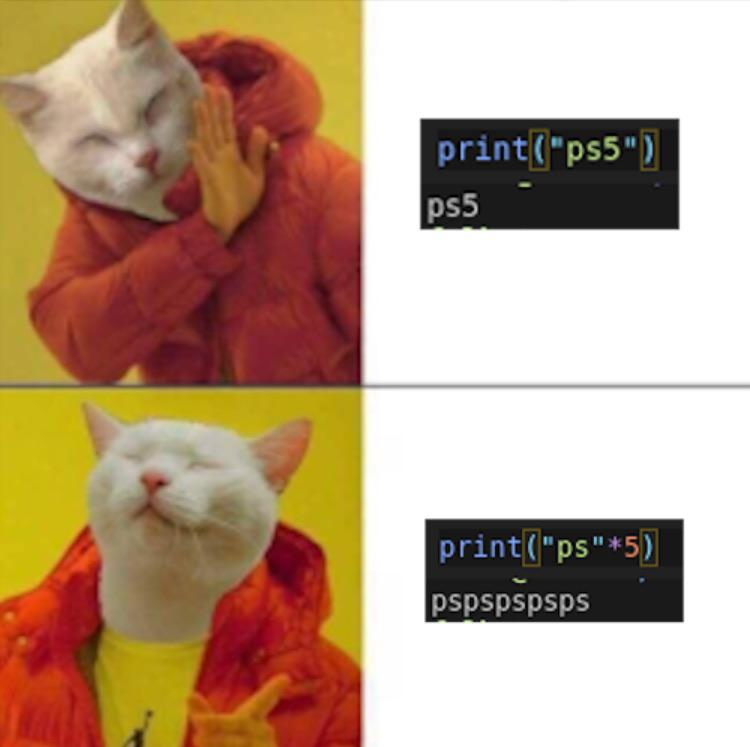

In [37]:
assert _hash(multiply_string('a')) == '11f86a430e', "The function didn't work for input='a'"
assert _hash(multiply_string('z')) == '6c6ed9ef14', "The function didn't work for input='z'"

def check_answer(function):
    try:
        function(5)
        raise Exception("The function shouldn't work for integers")
    except:
        pass
    
check_answer(multiply_string)

def finalize():    
    display(Image(filename=src, width=500))

print("---- all asserts passed ---- ")

finalize()

### And now... Mission Accomplished!!! 🎉🎉🎉
Now you can rest for this week, because your work was amaaaaaaazing (Again)!

**But don't forget...**

***

# Submit your work!

To submit your work, [get your slack id](https://moshfeu.medium.com/how-to-find-my-member-id-in-slack-workspace-d4bba942e38c) and fill it in the `slack_id` variable.

Example: `slack_id = "UTS63FC02"`

In [38]:
### BEGIN SOLUTION
slack_id = "UTS63FC02"
### END SOLUTION
# slack_id =

In [39]:
from submit import submit

assert slack_id is not None
submit(slack_id=slack_id, learning_unit=11)

Success
